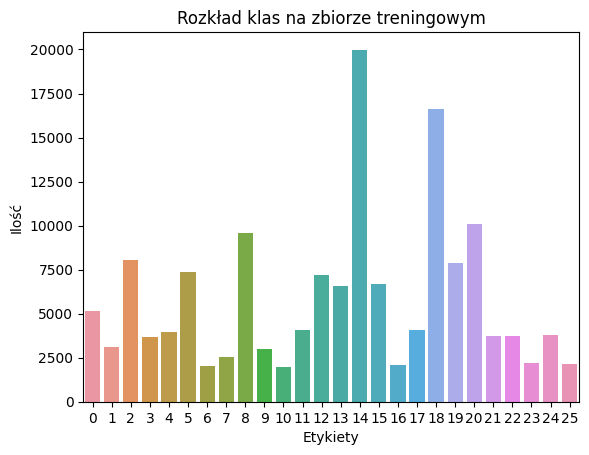

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")

pd_y_train = pd.DataFrame(y_train)

sum = pd_y_train.sum()

sns.barplot(x=sum.index, y=sum.values)
plt.title("Rozkład klas na zbiorze treningowym")
plt.xlabel("Etykiety")
plt.ylabel("Ilość")
plt.show()






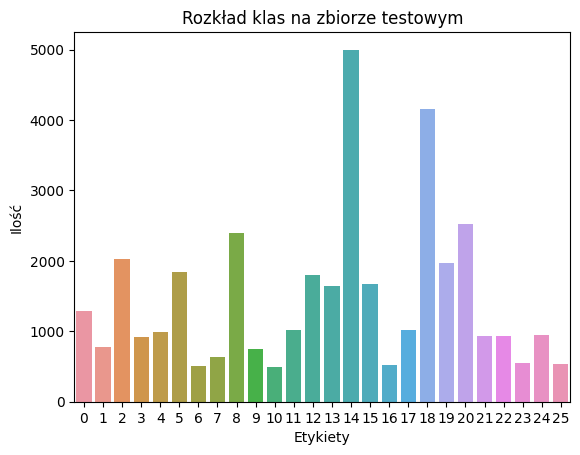

In [3]:
X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")

pd_y_val = pd.DataFrame(y_val)

sum2 = pd_y_val.sum()

sns.barplot(x=sum2.index, y=sum2.values)
plt.title("Rozkład klas na zbiorze testowym")
plt.xlabel("Etykiety")
plt.ylabel("Ilość")
plt.show()


In [4]:
import torch
X_train_torch = torch.from_numpy(X_train).float()

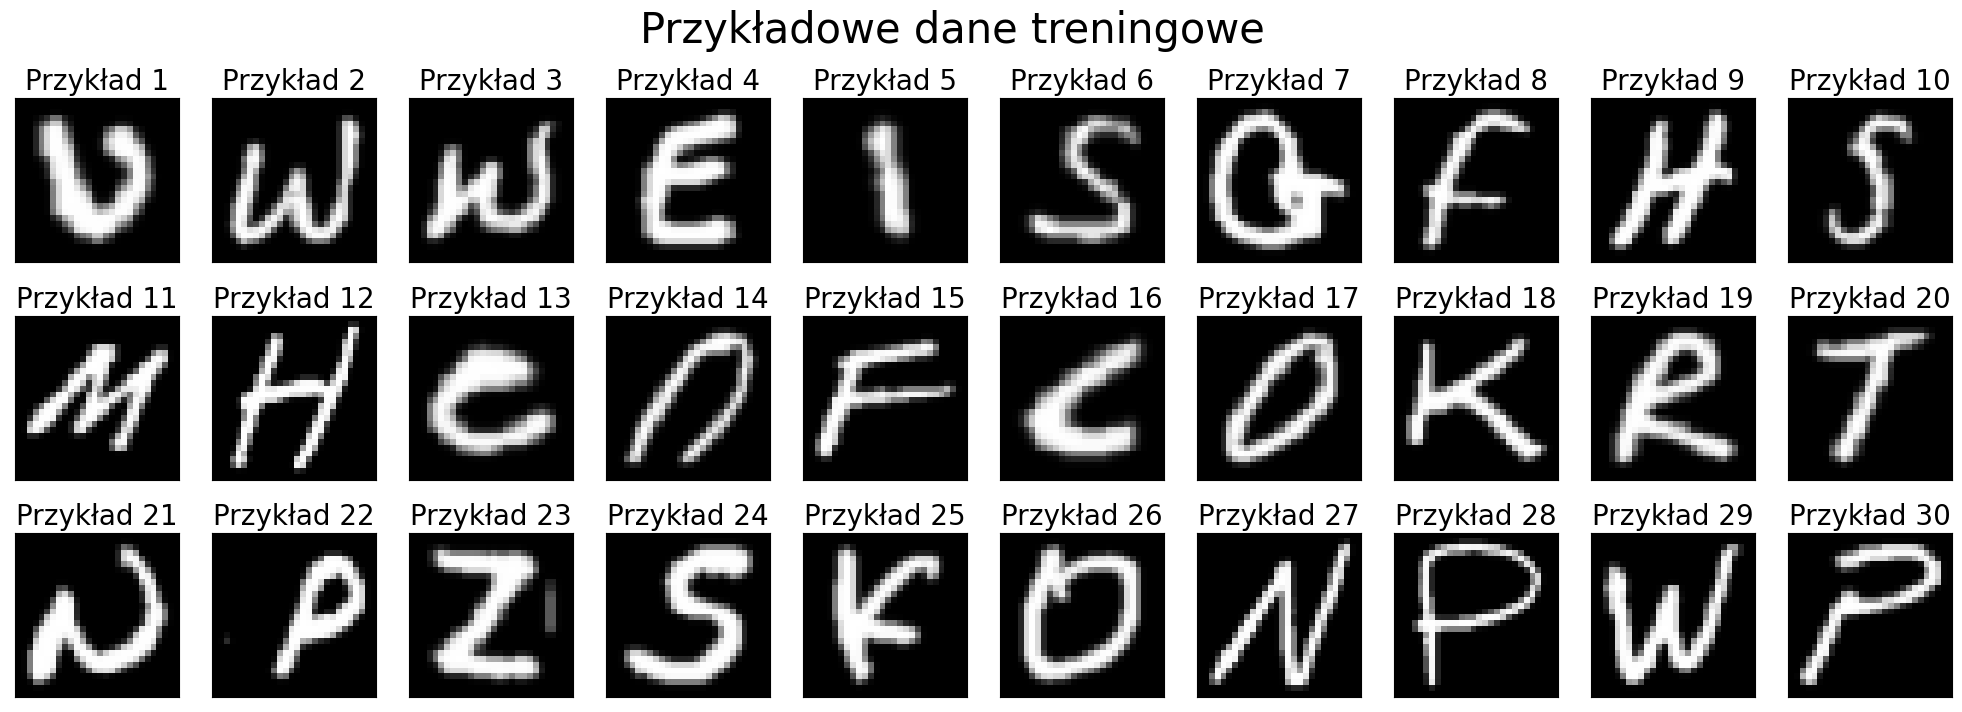

In [5]:
def visualize_data(data, cmap=None, num_samples=30, num_rows=3, num_cols=10, title=None):
    fig = plt.figure(figsize=(25, 8))
    if title:
        fig.suptitle(title, fontsize=30)
    for i in range(num_samples):
        ax = fig.add_subplot(num_rows, num_cols, i+1, xticks=[], yticks=[])
        ax.imshow(data[i].view(28, 28), cmap=cmap)
        ax.set_title(f"Przykład {i + 1}", fontsize=20)

visualize_data(X_train_torch, cmap='gray', num_samples=30, num_rows=3, num_cols=10, title="Przykładowe dane treningowe")
plt.show()


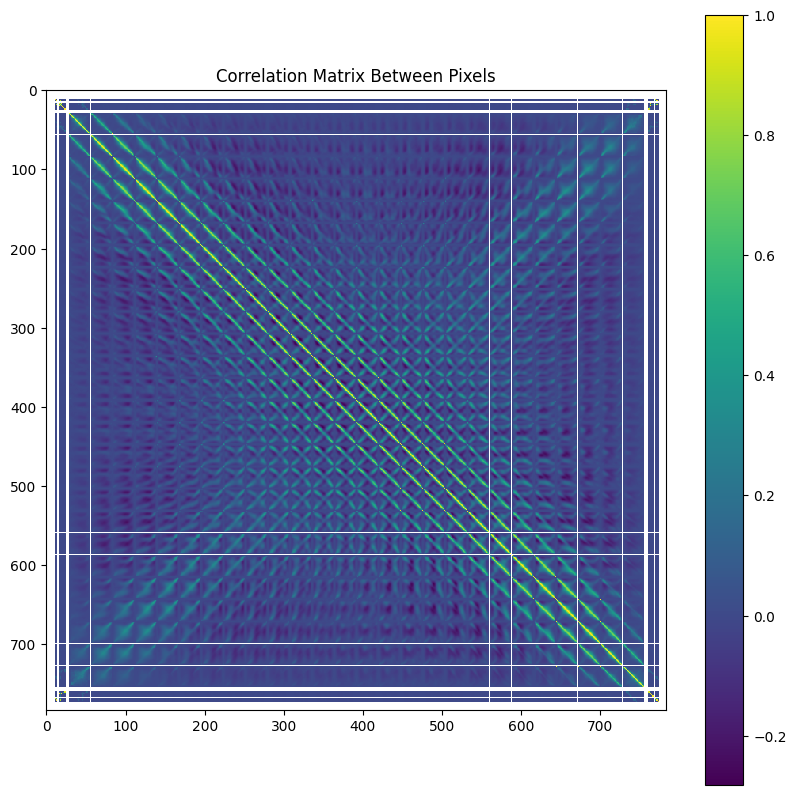

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

correlation_matrix = np.corrcoef(X_train.reshape(X_train.shape[0], -1), rowvar=False)

plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title("Correlation Matrix Between Pixels")
plt.show()


#### Wykorzystanie sieci neuronowych do nauki EMNIST

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import optim, nn
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader, Dataset



In [8]:
import preprocessing as pp # data preprocessing
train_loader, val_dataset = pp.preprocess()

import model as m # model
model = m.ConvNet(26)

import loops as l # training and evaluation loop
l.loop(model, train_loader, val_dataset)


epoch 1/1, step=1000/4724, loss=0.4656
epoch 1/1, step=2000/4724, loss=0.4519
epoch 1/1, step=3000/4724, loss=0.0575
epoch 1/1, step=4000/4724, loss=0.5050
Validation Accuracy: 93.23%


In [9]:
X_test = np.load("X_val.npy")


with torch.no_grad():
    test_inputs = torch.from_numpy(X_test).float()
    test_inputs = test_inputs.view(test_inputs.size(0), 1, 28, 28) # for ConvNet
    test_outputs = model(test_inputs)
    predictions = torch.argmax(test_outputs, dim=1)

import pandas as pd

# Create a DataFrame with ID and predictions
submission_df = pd.DataFrame({'index': range(len(predictions)), 'class': predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

submission_df.head()

,index,class
0,0,20
1,1,14
2,2,18
3,3,21
4,4,11


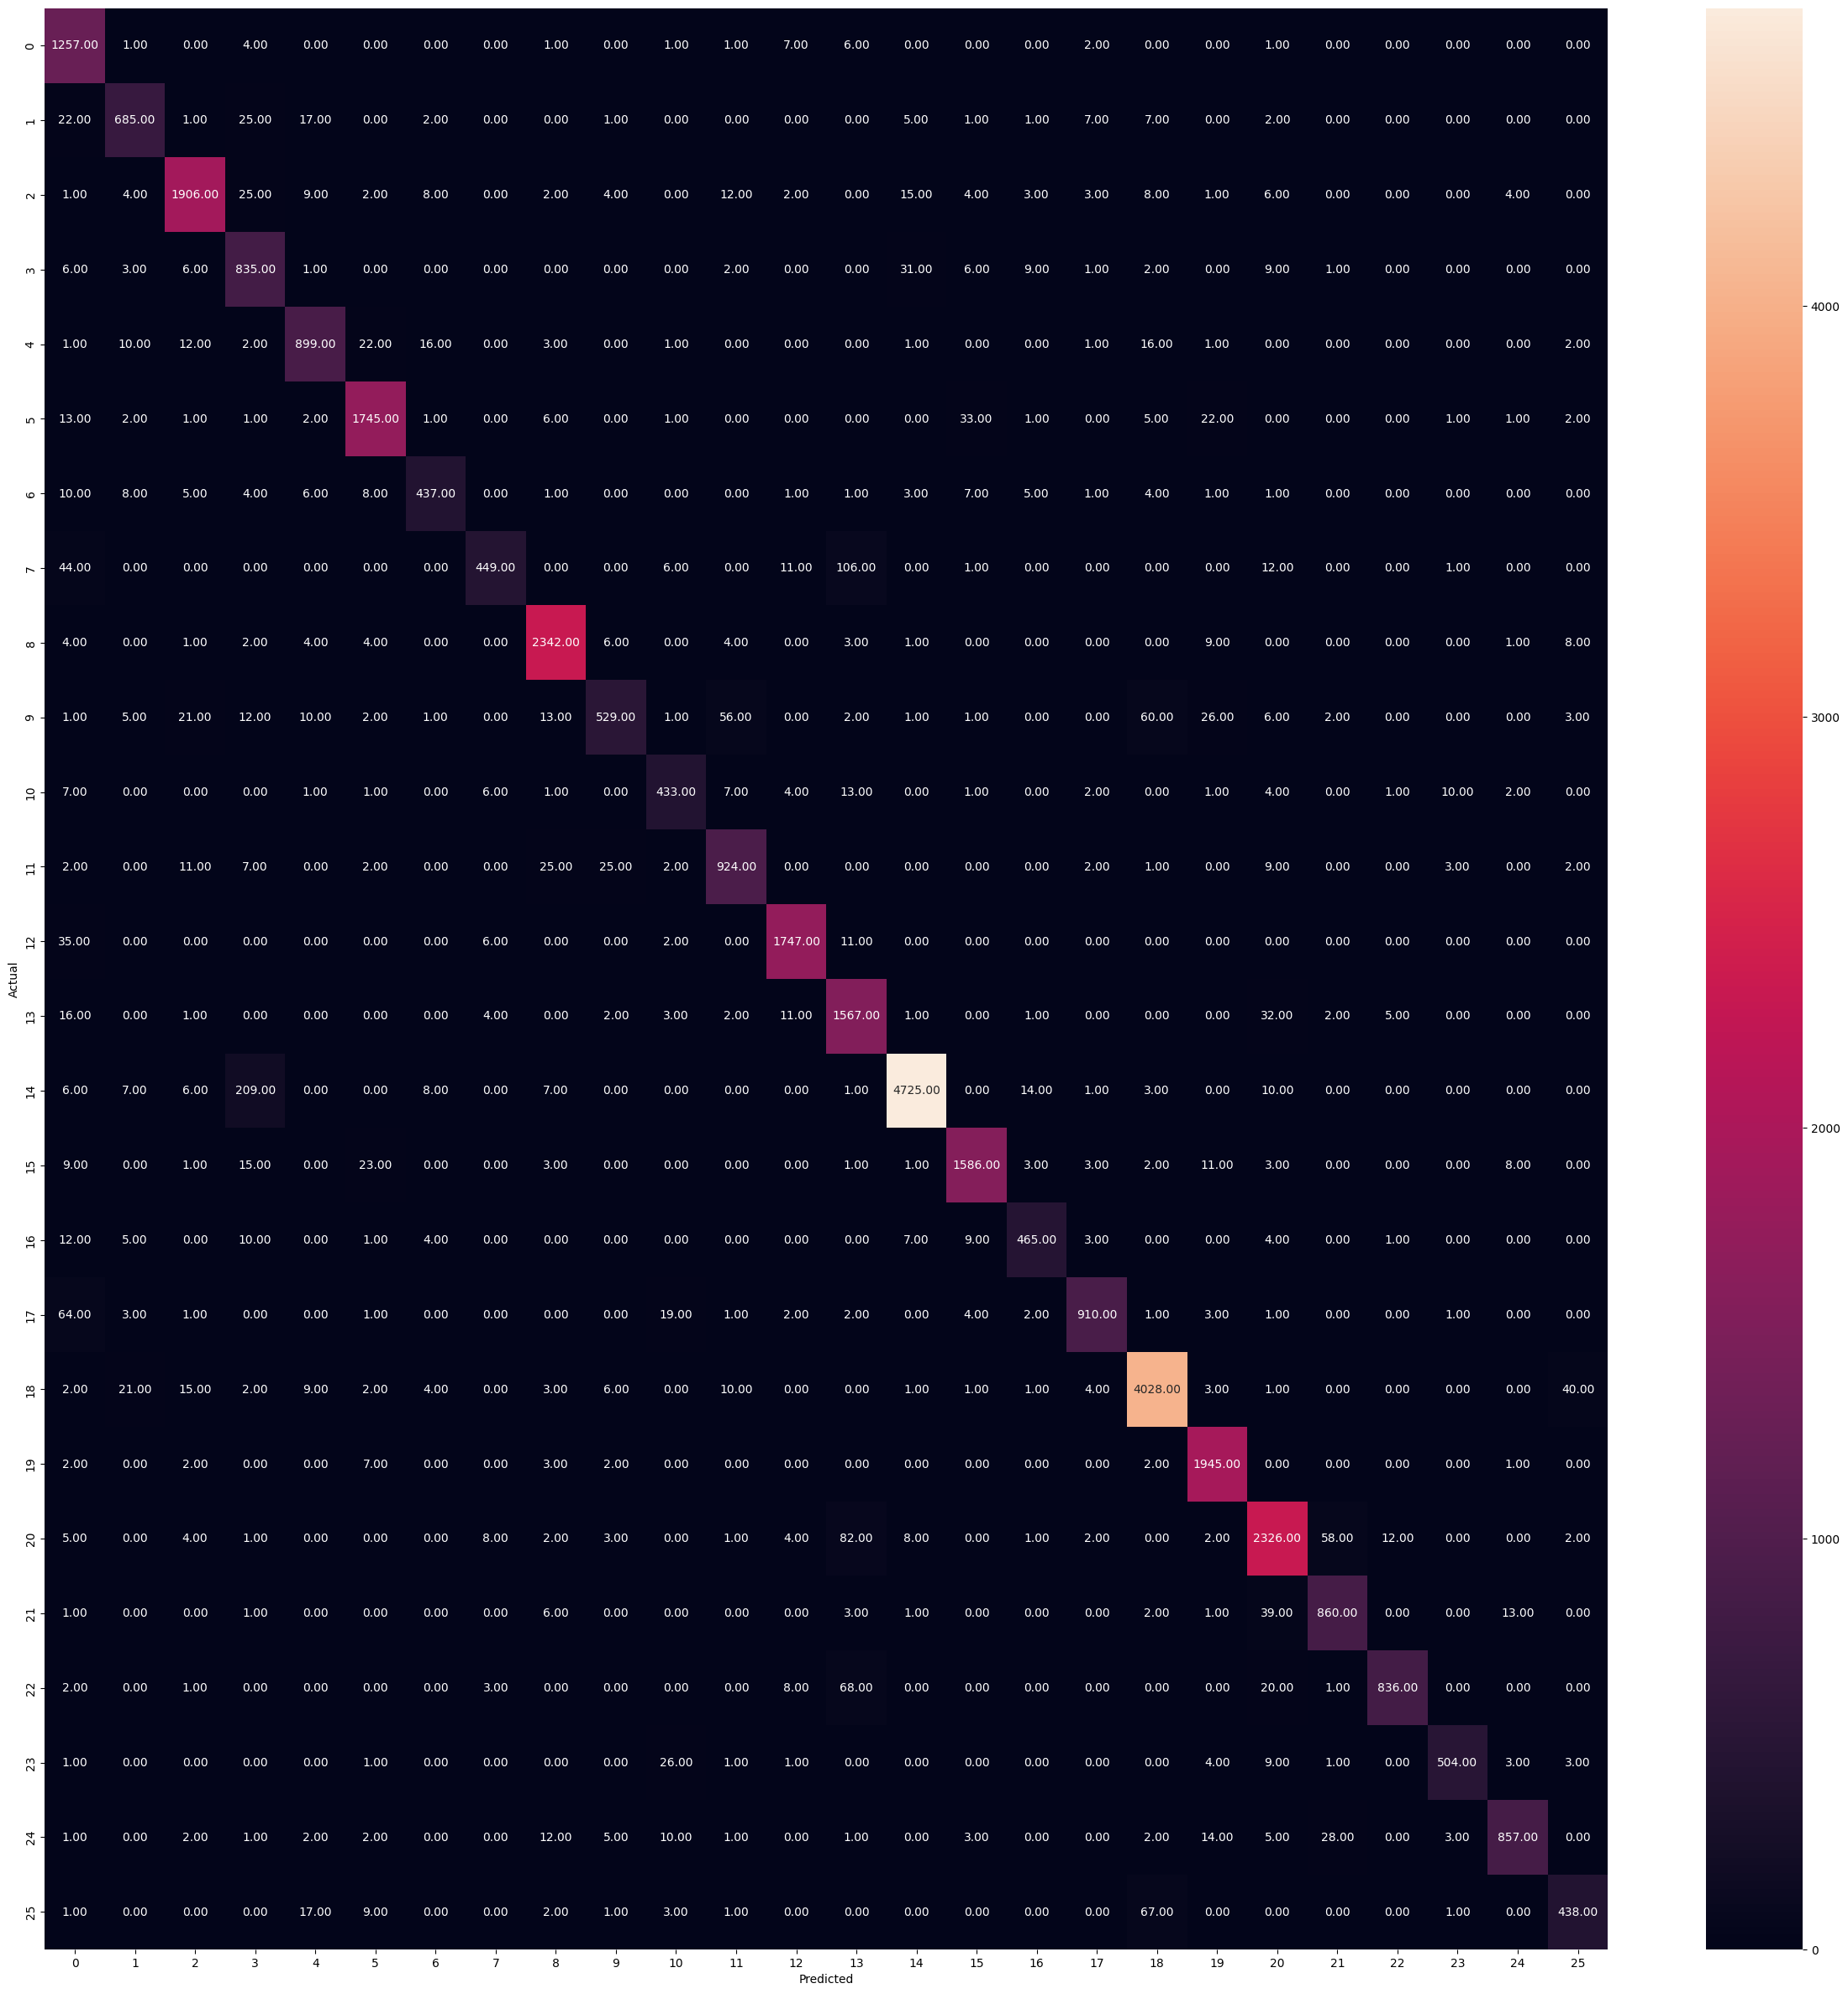

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_val = np.load("y_val.npy")
predictions_df = pd.read_csv("submission.csv")
labels = predictions_df["class"].to_numpy()

test_labels=np.argmax(y_val, axis=1)

cm = confusion_matrix(test_labels, labels)

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=range(26), yticklabels=range(26))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

